In [1]:
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
from collections import defaultdict
from os.path import join


In [2]:
def bootstrap_ci(x, confidence):
    values = [np.random.choice(x,size=len(x),replace=True).mean() for i in range(1000)]
    
    return np.percentile(values,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])

def ci(x, confidence):
    m = x.mean()
    s = x.std()
    dof = len(x) - 1
    t_crit = np.abs(t.ppf((1-confidence)/2,dof))
    return (m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))

In [30]:
domino_dir = './results/domino/rare'
domino_nopca_dir = './results/domino_nopca/rare'
contrastive_dir = './results/contrastive/rare'
contrastive_dist_dir = './results/contrastive_dist/rare'
contrastive_local_dir = './results/contrastive_local/rare'
contrastive_local_pca_dir = './results/contrastive_local_pca/rare'
reg_dir = './results/reg/rare'
weight_dir = './results/weight/rare'
entropy_dir = './results/entropy/rare'
entropy4_dir = './results/entropy4/rare'
kcenter_dir = './results/kcenter/rare/'

In [5]:
k = 25
m = 25

In [31]:
domino_metrics = defaultdict(dict)
domino_nopca_metrics = defaultdict(dict)
contrastive_metrics = defaultdict(dict)
contrastive_dist_metrics = defaultdict(dict)
contrastive_local_metrics = defaultdict(dict)
contrastive_local_pca_metrics = defaultdict(dict)
entropy_metrics = defaultdict(dict)
entropy4_metrics = defaultdict(dict)
kcenter_metrics = defaultdict(dict)

In [32]:
for lamda in [0, 5, 10, 20, 50, 100]:
    entropy_metrics[lamda] = defaultdict(list)
    entropy4_metrics[lamda] = defaultdict(list)
    for seed in range(5):
        entropy = pd.read_csv(join(entropy_dir, f'k{k}_m{m}_lambda_{lamda}_{seed}.csv'), header=0)
        entropy4 = pd.read_csv(join(entropy4_dir, f'k{k}_m{m}_lambda_{lamda}_{seed}.csv'), header=0)
        for col in metrics:
            entropy_metrics[lamda][col].append(entropy[col].to_numpy().mean())
            entropy4_metrics[lamda][col].append(entropy4[col].to_numpy().mean())

for lamda in [5, 10, 20, 50, 100]:
    domino_metrics[lamda] = defaultdict(list)
    for seed in range(5):
        domino = pd.read_csv(join(domino_dir, f'k{k}_m{m}_lambda_{float(lamda)}_{seed}.csv'), header=0)
        for col in metrics:
            domino_metrics[lamda][col].append(domino[col].to_numpy().mean())

for lamda in [5, 10, 20, 50, 100]:
    kcenter_metrics[lamda] = defaultdict(list)
    for seed in range(5):
        try:
            kcenter = pd.read_csv(join(kcenter_dir, f'k{k}_m{m}_lambda_{float(lamda)}_{seed}.csv'), header=0)
            for col in metrics:
                kcenter_metrics[lamda][col].append(kcenter[col].to_numpy().mean())
        except:
            continue

for lamda in [10, 20, 100]:
    domino_nopca_metrics[lamda] = defaultdict(list)
    for seed in range(5):
        domino_nopca = pd.read_csv(join(domino_nopca_dir, f'k{k}_m{m}_lambda_{float(lamda)}_{seed}.csv'), header=0)
        for col in metrics:
            domino_nopca_metrics[lamda][col].append(domino_nopca[col].to_numpy().mean())

for lamda in [0, 10, 20, 50, 100]:
    contrastive_metrics[lamda] = defaultdict(list)
    for seed in range(5):
        contrastive = pd.read_csv(join(contrastive_dir, f'k{k}_m{m}_lambda_{float(lamda)}_{seed}.csv'), header=0)
        for col in metrics:
            contrastive_metrics[lamda][col].append(contrastive[col].to_numpy().mean())

for lamda in [0, 10, 20, 100]:
    contrastive_dist_metrics[lamda] = defaultdict(list)
    for seed in range(5):
        contrastive_dist = pd.read_csv(join(contrastive_dist_dir, f'k{k}_m{m}_lambda_{float(lamda)}_{seed}.csv'), header=0)
        for col in metrics:
            contrastive_dist_metrics[lamda][col].append(contrastive_dist[col].to_numpy().mean())

for lamda in [0, 10, 20, 100]:
    contrastive_local_metrics[lamda] = defaultdict(list)
    for seed in range(5):
        try:
            contrastive_local = pd.read_csv(join(contrastive_local_dir, f'k{k}_m{m}_lambda_{float(lamda)}_{seed}.csv'), header=0)
            for col in metrics:
                contrastive_local_metrics[lamda][col].append(contrastive_local[col].to_numpy().mean())
        except:
            continue

for lamda in [0, 10, 20, 100]:
    contrastive_local_pca_metrics[lamda] = defaultdict(list)
    for seed in range(5):
        try:
            contrastive_local_pca = pd.read_csv(join(contrastive_local_pca_dir, f'k{k}_m{m}_lambda_{float(lamda)}_{seed}.csv'), header=0)
            for col in metrics:
                contrastive_local_pca_metrics[lamda][col].append(contrastive_local_pca[col].to_numpy().mean())
        except:
            continue

In [14]:
entropy = {
    'domino': np.array(domino_metrics[20]['err_entropy']).mean(),
    'entropy': np.array(entropy_metrics[20]['err_entropy']).mean(),
    'entropy4': np.array(entropy4_metrics[20]['err_entropy']).mean()
}
p10 = {
    'domino': np.array(domino_metrics[20]['precision-at-10']).mean(),
    'entropy': np.array(entropy_metrics[20]['precision-at-10']).mean(),
    'entropy4': np.array(entropy4_metrics[20]['precision-at-10']).mean()
}

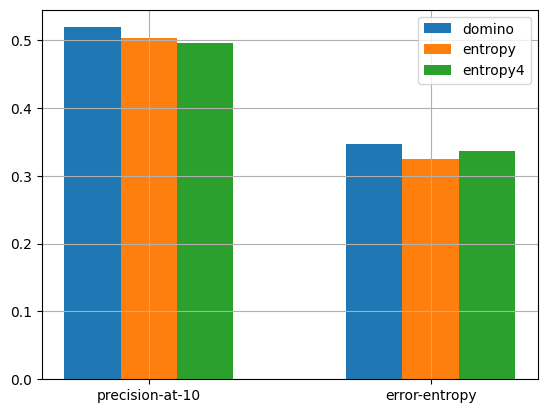

In [21]:
xpos = np.arange(2) + 0.2
shift = {
    'domino': -0.2,
    'entropy': 0.0,
    'entropy4': 0.2
}
plt.bar(xpos+shift['domino'], [p10['domino'], entropy['domino']], width=0.2, alpha=1, ecolor='black', label='domino')
plt.bar(xpos+shift['entropy'], [p10['entropy'], entropy['entropy']], width=0.2, alpha=1, ecolor='black', label='entropy')
plt.bar(xpos+shift['entropy4'], [p10['entropy4'], entropy['entropy4']], width=0.2, alpha=1, ecolor='black', label='entropy4')
plt.legend()
plt.xticks(xpos, ['precision-at-10', 'error-entropy'])
plt.grid()

(0.0, 0.5528074561403509)

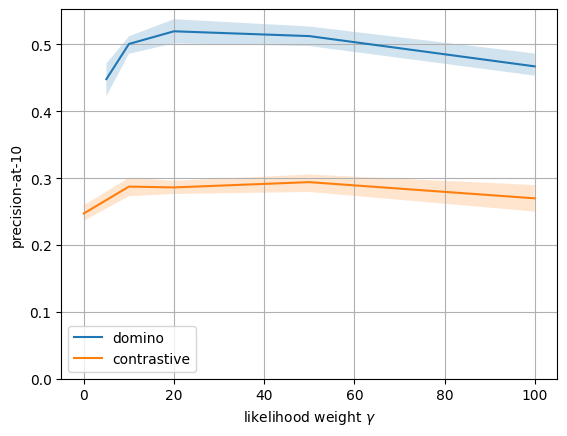

In [38]:
metric = 'precision-at-10'

mmap = defaultdict(list)
ci_min = defaultdict(list)
ci_max = defaultdict(list)
for key in domino_metrics:
    mmap['domino'].append(np.array(domino_metrics[key][metric]).mean())
    ci_ = bootstrap_ci(domino_metrics[key][metric], 0.95)
    ci_min['domino'].append(ci_[0])
    ci_max['domino'].append(ci_[1])

for key in entropy_metrics:
    mmap['entropy'].append(np.array(entropy_metrics[key][metric]).mean())
    ci_ = bootstrap_ci(entropy_metrics[key][metric], 0.95)
    ci_min['entropy'].append(ci_[0])
    ci_max['entropy'].append(ci_[1])

for key in entropy4_metrics:
    mmap['entropy4'].append(np.array(entropy4_metrics[key][metric]).mean())
    ci_ = bootstrap_ci(entropy4_metrics[key][metric], 0.95)
    ci_min['entropy4'].append(ci_[0])
    ci_max['entropy4'].append(ci_[1])

for key in kcenter_metrics:
    mmap['kcenter'].append(np.array(kcenter_metrics[key][metric]).mean())
    ci_ = bootstrap_ci(kcenter_metrics[key][metric], 0.95)
    ci_min['kcenter'].append(ci_[0])
    ci_max['kcenter'].append(ci_[1])

for key in domino_nopca_metrics:
    mmap['domino_nopca'].append(np.array(domino_nopca_metrics[key][metric]).mean())
    ci_ = bootstrap_ci(domino_nopca_metrics[key][metric], 0.95)
    ci_min['domino_nopca'].append(ci_[0])
    ci_max['domino_nopca'].append(ci_[1])
    
for key in contrastive_metrics:
    mmap['contrastive'].append(np.array(contrastive_metrics[key][metric]).mean())
    ci_ = bootstrap_ci(contrastive_metrics[key][metric], 0.95)
    ci_min['contrastive'].append(ci_[0])
    ci_max['contrastive'].append(ci_[1])

for key in contrastive_dist_metrics:
    mmap['contrastive_dist'].append(np.array(contrastive_dist_metrics[key][metric]).mean())
    ci_ = bootstrap_ci(contrastive_dist_metrics[key][metric], 0.95)
    ci_min['contrastive_dist'].append(ci_[0])
    ci_max['contrastive_dist'].append(ci_[1])

for key in contrastive_local_metrics:
    mmap['contrastive_local'].append(np.array(contrastive_local_metrics[key][metric]).mean())
    ci_ = bootstrap_ci(contrastive_local_metrics[key][metric], 0.95)
    ci_min['contrastive_local'].append(ci_[0])
    ci_max['contrastive_local'].append(ci_[1])

for key in contrastive_local_pca_metrics:
    mmap['contrastive_local_pca'].append(np.array(contrastive_local_pca_metrics[key][metric]).mean())
    ci_ = bootstrap_ci(contrastive_local_pca_metrics[key][metric], 0.95)
    ci_min['contrastive_local_pca'].append(ci_[0])
    ci_max['contrastive_local_pca'].append(ci_[1])

plt.plot([*domino_metrics.keys()], mmap['domino'], label='domino')
plt.fill_between([*domino_metrics.keys()], ci_min['domino'], ci_max['domino'], alpha=0.2)

# plt.plot([*entropy_metrics.keys()], mmap['entropy'], label='entropy')
# plt.fill_between([*entropy_metrics.keys()], ci_min['entropy'], ci_max['entropy'], alpha=0.2)

# plt.plot([*entropy4_metrics.keys()], mmap['entropy4'], label='entropy4')
# plt.fill_between([*entropy4_metrics.keys()], ci_min['entropy4'], ci_max['entropy4'], alpha=0.2)

# plt.plot([*kcenter_metrics.keys()], mmap['kcenter'], label='kcenter')
# plt.fill_between([*kcenter_metrics.keys()], ci_min['kcenter'], ci_max['kcenter'], alpha=0.2)

# plt.plot([*domino_nopca_metrics.keys()], mmap['domino_nopca'], label='domino_nopca')
# plt.fill_between([*domino_nopca_metrics.keys()], ci_min['domino_nopca'], ci_max['domino_nopca'], alpha=0.2)

plt.plot([*contrastive_metrics.keys()], mmap['contrastive'], label='contrastive')
plt.fill_between([*contrastive_metrics.keys()], ci_min['contrastive'], ci_max['contrastive'], alpha=0.2)

# plt.plot([*contrastive_dist_metrics.keys()], mmap['contrastive_dist'], label='contrastive_dist')
# plt.fill_between([*contrastive_dist_metrics.keys()], ci_min['contrastive_dist'], ci_max['contrastive_dist'], alpha=0.2)

# plt.plot([*contrastive_local_metrics.keys()], mmap['contrastive_local'], label='contrastive_local')
# plt.fill_between([*contrastive_local_metrics.keys()], ci_min['contrastive_local'], ci_max['contrastive_local'], alpha=0.2)

# plt.plot([*contrastive_local_pca_metrics.keys()], mmap['contrastive_local_pca'], label='contrastive_local_pca')
# plt.fill_between([*contrastive_local_pca_metrics.keys()], ci_min['contrastive_local_pca'], ci_max['contrastive_local_pca'], alpha=0.2)

plt.legend()
plt.xlabel(r'likelihood weight $\gamma$')
plt.ylabel(metric)
plt.grid()
plt.ylim(bottom=0)

In [18]:
domino_metrics[20]

defaultdict(list,
            {'precision-at-10': [0.4973684210526316,
              0.5350877192982456,
              0.518421052631579,
              0.4973684210526316,
              0.5499999999999999],
             'precision-at-25': [0.46456140350877195,
              0.4943859649122807,
              0.4796491228070176,
              0.4568421052631579,
              0.5154385964912281],
             'precision': [0.407252993391156,
              0.4193599876335103,
              0.43278209467541445,
              0.40808965533719965,
              0.45397349497854816],
             'recall': [0.4620812402096972,
              0.5017660466310054,
              0.4848428176363107,
              0.5119077498807587,
              0.49386984449149607]})

In [39]:
metrics = ['precision-at-10', 'precision-at-25', 'precision', 'recall']#, 'err_entropy']
xpos = np.arange(len(metrics)) + 0.2
shift = {
    'domino': -.15,
    'contrastive': 0.15
}

In [40]:
max_seed = {
    'domino': 20,
    'contrastive': 50
}

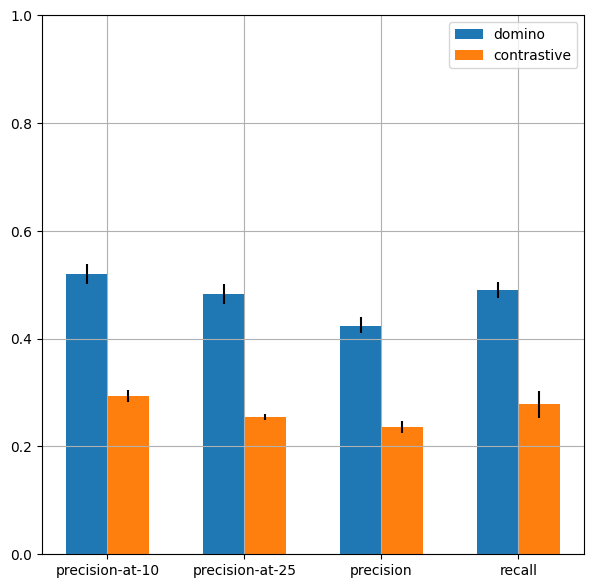

In [41]:
fig = plt.figure(figsize=(7,7))
for method in ['domino', 'contrastive']:
    p10 = np.array(eval(f'{method}_metrics')[max_seed[method]]['precision-at-10'])
    p10_ci = bootstrap_ci(p10, 0.95)

    p25 = np.array(eval(f'{method}_metrics')[max_seed[method]]['precision-at-25'])
    p25_ci = bootstrap_ci(p25, 0.95)

    precision = np.array(eval(f'{method}_metrics')[max_seed[method]]['precision'])
    precision_ci = bootstrap_ci(precision, 0.95)

    recall = np.array(eval(f'{method}_metrics')[max_seed[method]]['recall'])
    recall_ci = bootstrap_ci(recall, 0.95)

    means = np.array([p10.mean(), p25.mean(), precision.mean(), recall.mean()])
    ci = np.stack([p10_ci, p25_ci, precision_ci, recall_ci], axis=1)
    errors = np.stack([means - ci[0], ci[1] - means])
    plt.bar(xpos+shift[method], means, yerr=errors, width=0.3, alpha=1, ecolor='black', label=method)
    
plt.grid(which='both')
plt.legend()
plt.ylim(top=1.0)
plt.xticks(xpos, metrics)
# plt.title(r"Top $\hat{k}$"+ '={} clusters from '.format(k) + r"$\bar{k}$" + "={} slices.".format(m))

# plt.savefig('./kcenter_domino_rare_natural.png')
plt.show()